In [1]:
# Library Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # Library for saving models
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from pathlib import Path

# Setup Data

sns.set_style("whitegrid")

# Define Paths

cwd = Path.cwd()
BASE_DIR = cwd.parent
DATA_DIR = BASE_DIR / "data"
DATA_PROCESSED_DIR = DATA_DIR / "processed"
MODELS_DIR = BASE_DIR / "models"
REPORTS_DIR = BASE_DIR / "reports"
FIGURES_DIR = REPORTS_DIR / "figures"

# Create directories if they do not exist

MODELS_DIR.mkdir(parents=True, exist_ok=True)
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

print(f"Paths set.")
print(f"Models will be saved to: {MODELS_DIR}")
print(f"Figures will be saved to: {FIGURES_DIR}")

Paths set.
Models will be saved to: c:\Users\Lenovo\Documents\GitHub\Demographic-Change_Understanding-Fertility-Through-Data\models
Figures will be saved to: c:\Users\Lenovo\Documents\GitHub\Demographic-Change_Understanding-Fertility-Through-Data\reports\figures


In [2]:
# Load Data

train_path = DATA_PROCESSED_DIR / "panel_country_split_train.csv"
test_path = DATA_PROCESSED_DIR / "panel_country_split_test.csv"

# Load Datasets

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Separate Target and Features

target = 'fertility'
features = ['migration', 'urban_pop', 'flfp', 'Year'] 

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

print("Data loaded successfully.")

Data loaded successfully.


In [3]:
# Train the Model

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

print("Decision Tree Model trained.")

Decision Tree Model trained.


In [4]:
# Evaluate and Save Metrics

y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)

def calculate_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

rmse_train, mae_train, r2_train = calculate_metrics(y_train, y_pred_train)
rmse_test, mae_test, r2_test = calculate_metrics(y_test, y_pred_test)

# Prepare the Report Text

metric_report = (
    "Decision Tree Regression Results\n"
    "================================\n"
    f"Training Set:\n"
    f"  RMSE: {rmse_train:.4f}\n"
    f"  MAE:  {mae_train:.4f}\n"
    f"  R2:   {r2_train:.4f}\n\n"
    f"Test Set:\n"
    f"  RMSE: {rmse_test:.4f}\n"
    f"  MAE:  {mae_test:.4f}\n"
    f"  R2:   {r2_test:.4f}\n"
)

print(metric_report)

# Save metrics to a text file in models directory

metrics_path = MODELS_DIR / "decision_tree_metrics.txt"
with open(metrics_path, "w") as f:
    f.write(metric_report)

print(f"✅ Metrics saved to: {metrics_path}")

Decision Tree Regression Results
Training Set:
  RMSE: 0.0000
  MAE:  0.0000
  R2:   1.0000

Test Set:
  RMSE: 0.9123
  MAE:  0.4343
  R2:   0.8011

✅ Metrics saved to: c:\Users\Lenovo\Documents\GitHub\Demographic-Change_Understanding-Fertility-Through-Data\models\decision_tree_metrics.txt


✅ Plot saved to: c:\Users\Lenovo\Documents\GitHub\Demographic-Change_Understanding-Fertility-Through-Data\reports\figures\decision_tree_actual_vs_predicted.png


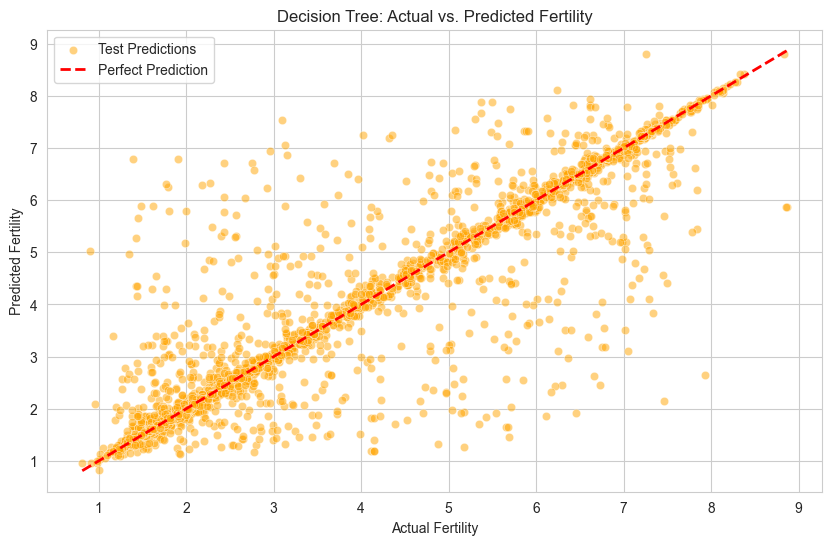

In [5]:
# Visualization: Actual vs Predicted

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.5, color='orange', label='Test Predictions')

# Perfect Prediction Line

min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

plt.title("Decision Tree: Actual vs. Predicted Fertility")
plt.xlabel("Actual Fertility")
plt.ylabel("Predicted Fertility")
plt.legend()

# Save the Plot

plot_path = FIGURES_DIR / "decision_tree_actual_vs_predicted.png"
plt.savefig(plot_path, dpi=300)
print(f"✅ Plot saved to: {plot_path}")

plt.show()

✅ Feature importance data saved to: c:\Users\Lenovo\Documents\GitHub\Demographic-Change_Understanding-Fertility-Through-Data\models\decision_tree_feature_importance.csv


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25572\2929206247.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_imp, palette='viridis')


✅ Feature importance plot saved to: c:\Users\Lenovo\Documents\GitHub\Demographic-Change_Understanding-Fertility-Through-Data\reports\figures\decision_tree_feature_importance.png


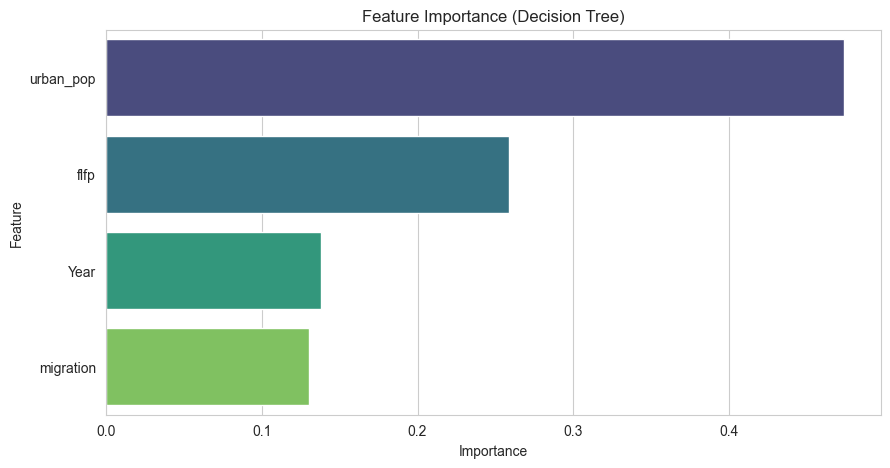

In [6]:
# Feature Importance

importances = dt_model.feature_importances_
df_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
df_imp = df_imp.sort_values(by='Importance', ascending=False)

# Save feature importance to CSV

csv_path = MODELS_DIR / "decision_tree_feature_importance.csv"
df_imp.to_csv(csv_path, index=False)
print(f"✅ Feature importance data saved to: {csv_path}")

# Plot and Save

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=df_imp, palette='viridis')
plt.title("Feature Importance (Decision Tree)")

imp_plot_path = FIGURES_DIR / "decision_tree_feature_importance.png"
plt.savefig(imp_plot_path, dpi=300)
print(f"✅ Feature importance plot saved to: {imp_plot_path}")

plt.show()

In [7]:
# Save the Trained Model

model_path = MODELS_DIR / "decision_tree_model.pkl"

joblib.dump(dt_model, model_path)
print(f"✅ Trained model saved to: {model_path}")

✅ Trained model saved to: c:\Users\Lenovo\Documents\GitHub\Demographic-Change_Understanding-Fertility-Through-Data\models\decision_tree_model.pkl
